In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
stores = pd.read_csv('D:/SampleData/stores.csv')

In [7]:
stores.plot?

### scatter plot

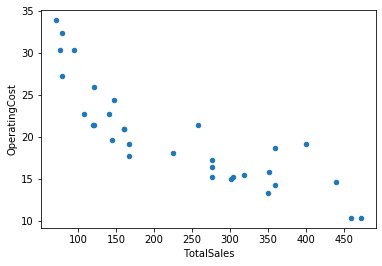

In [11]:
stores.plot( x = 'TotalSales', y = 'OperatingCost', kind = 'scatter' )
plt.show()

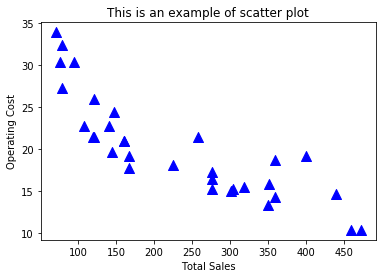

In [26]:
plt.scatter( stores.TotalSales, stores.OperatingCost, s = 100, c = 'blue', marker = '^' )
plt.xlabel('Total Sales')
plt.ylabel('Operating Cost')
plt.title('This is an example of scatter plot')
plt.show()

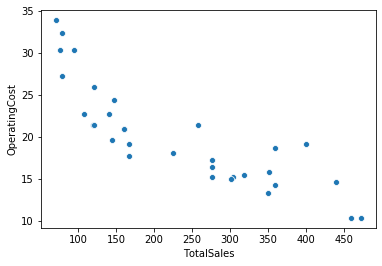

In [29]:
sns.scatterplot( stores.TotalSales, stores.OperatingCost )
plt.show()

### cross table

In [34]:
stores.columns

Index(['StoreCode', 'StoreName', 'StoreType', 'Location', 'OperatingCost',
       'Staff_Cnt', 'TotalSales', 'Total_Customers', 'AcqCostPercust',
       'BasketSize', 'ProfitPercust', 'OwnStore', 'OnlinePresence', 'Tenure',
       'StoreSegment'],
      dtype='object')

In [35]:
pd.crosstab( stores.Location, stores.StoreSegment )

StoreSegment,1,2,3,4
Location,,,,
Chennai,0,1,3,4
Delhi,3,2,0,3
Kolkata,1,4,0,3
Mumbai,3,3,0,2


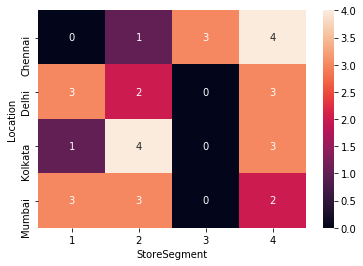

In [39]:
sns.heatmap( pd.crosstab( stores.Location, stores.StoreSegment ), annot = True )
plt.show()

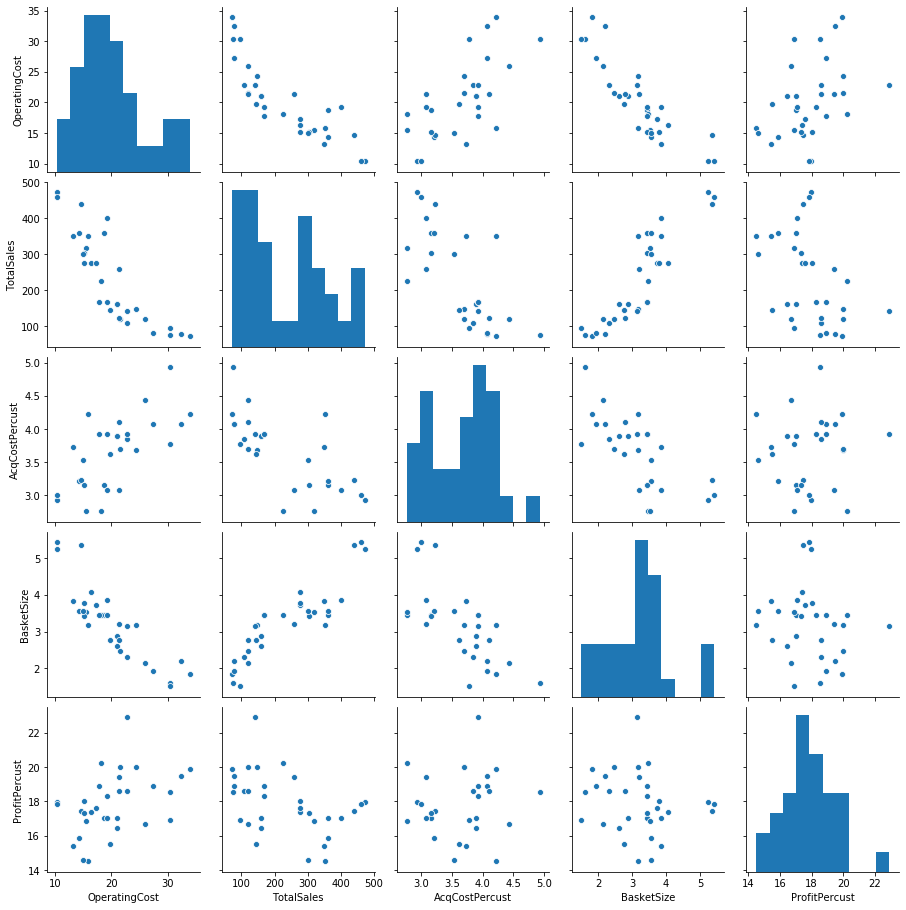

In [43]:
sns.pairplot( stores.loc[:, stores.dtypes == 'float64'] )

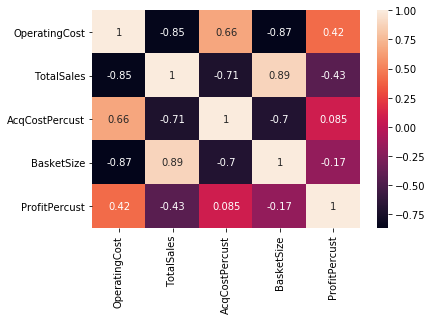

In [48]:
sns.heatmap( stores.loc[:, stores.dtypes == 'float64'].corr(), annot = True )
plt.show()

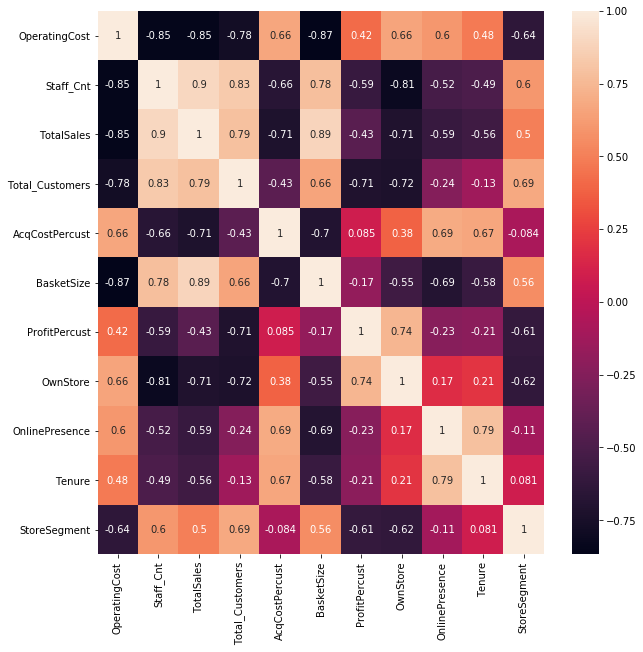

In [50]:
plt.figure( figsize = (10, 10))
sns.heatmap( stores.select_dtypes(['float64', 'int64']).corr(), annot = True )
plt.show()

In [52]:
stores.select_dtypes(['float64', 'int64']).corr().to_excel('Corr.xlsx')

### distribution for categorical variables - countplot

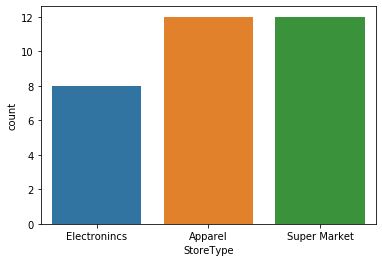

In [55]:
sns.countplot( stores.StoreType )
plt.show()

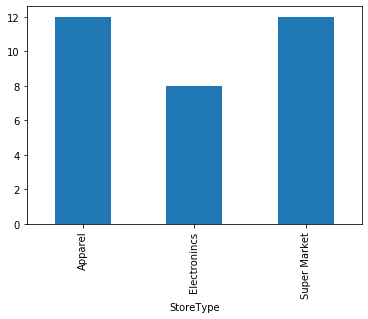

In [58]:
stores.groupby('StoreType').StoreCode.count().plot( kind = 'bar' )
plt.show()

In [59]:
stores.StoreType.nunique()

3

In [60]:
stores.StoreType.value_counts()

Super Market    12
Apparel         12
Electronincs     8
Name: StoreType, dtype: int64

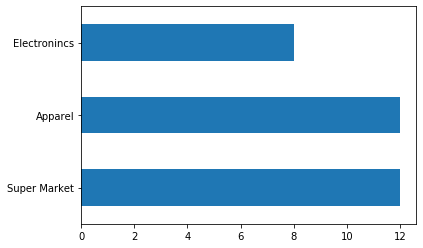

In [63]:
stores.StoreType.value_counts().plot( kind = 'barh' )
plt.show()

In [66]:
summ = stores.StoreType.value_counts()
summ

Super Market    12
Apparel         12
Electronincs     8
Name: StoreType, dtype: int64

In [70]:
summ.index

Index(['Super Market', 'Apparel', 'Electronincs'], dtype='object')

<BarContainer object of 3 artists>

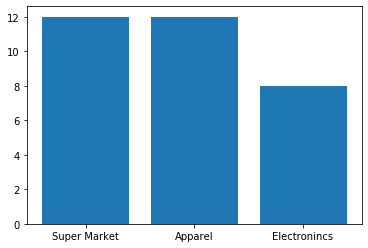

In [71]:
plt.bar( x = summ.index, height = summ )

### bar charts

Location wise sales

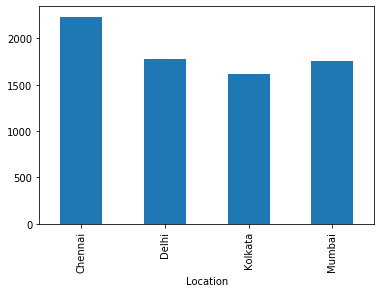

In [82]:
stores.groupby('Location').TotalSales.sum().plot( kind = 'bar' )
plt.show()

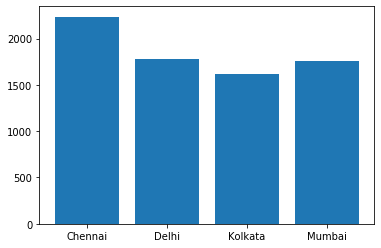

In [75]:
summ = stores.groupby('Location').TotalSales.sum()
plt.bar( summ.index, summ )
plt.show()

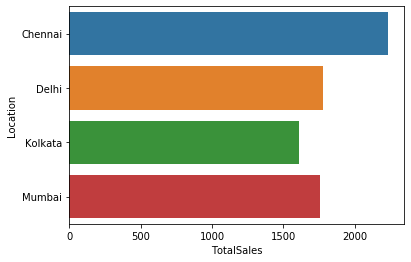

In [79]:
sns.barplot( summ, summ.index )
plt.show()

### pie

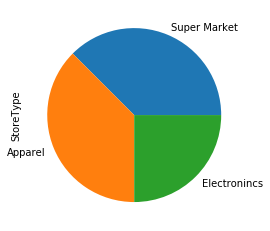

In [86]:
stores.StoreType.value_counts().plot( kind = 'pie' )
plt.show()

### clustered charts | stacked charts

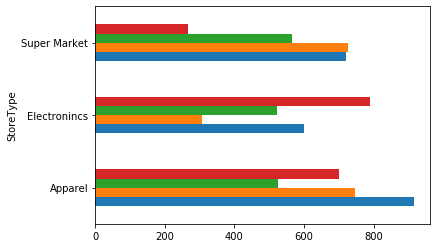

In [94]:
stores.pivot_table( columns = 'Location', index = 'StoreType', 
        values = 'TotalSales', aggfunc = 'sum').plot( kind = 'barh', legend = False)
plt.show()

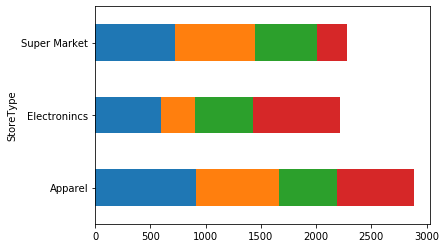

In [95]:
stores.pivot_table( columns = 'Location', index = 'StoreType', 
        values = 'TotalSales', aggfunc = 'sum').plot( kind = 'barh', legend = False, stacked = True )
plt.show()

### 100% stacked charts

In [104]:
summ = stores.pivot_table( index = 'Location', columns = 'StoreType', 
        values = 'TotalSales', aggfunc = 'sum')
summ

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,915.4,600.8,719.2
Delhi,745.0,306.7,726.0
Kolkata,525.0,521.0,566.4
Mumbai,700.7,790.0,266.9


In [109]:
summ.div( summ.sum( axis = 1 ), axis = 0 )

StoreType,Apparel,Electronincs,Super Market
Location,,,
Chennai,0.409502,0.268766,0.321732
Delhi,0.419081,0.172526,0.408393
Kolkata,0.325602,0.323121,0.351278
Mumbai,0.398669,0.449477,0.151855


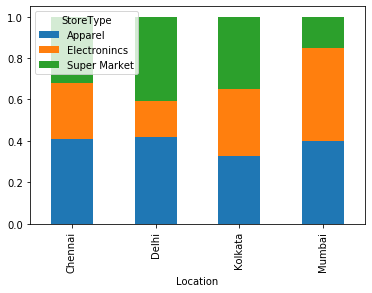

In [112]:
summ.div( summ.sum( axis = 1 ), axis = 0 ).plot( kind = 'bar', stacked = True )

### np.where()

In [122]:
pd.Series(np.where( stores.OnlinePresence == 1, 'Yes', 'No' )).head(2)

0    Yes
1    Yes
dtype: object

In [117]:
stores.Location.str.upper().head(2)

0    DELHI
1    DELHI
Name: Location, dtype: object

In [120]:
stores.loc[:, 'Location'] = stores.Location.apply( lambda x: x.upper() )

#### date and time

In [124]:
dob = pd.Series(["07Sep59","01Jan55","15Dec47","11Jul42", "22Aug02"])

In [126]:
pd.to_datetime( dob, format = '%d%b%y' ) + pd.DateOffset( years = -100 )

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
4   1902-08-22
dtype: datetime64[ns]

In [142]:
pd.to_datetime( dob, format = '%d%b%y').dt.year

0    2059
1    2055
2    2047
3    2042
4    2002
dtype: int64

In [140]:
(pd.to_datetime( dob, format = '%d%b%y') + pd.DateOffset( years = -100 )).dt.year

0    1959
1    1955
2    1947
3    1942
4    1902
dtype: int64

In [141]:
pd.Series(np.where( (pd.to_datetime( dob, format = '%d%b%y') + pd.DateOffset( years = -100 )).dt.year < 1940,
         pd.to_datetime( dob, format = '%d%b%y'),
         pd.to_datetime( dob, format = '%d%b%y') + pd.DateOffset( years = -100 )))

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
4   2002-08-22
dtype: datetime64[ns]

In [143]:
pd.Series(np.where( pd.to_datetime( dob, format = '%d%b%y').dt.year < 2020,
         pd.to_datetime( dob, format = '%d%b%y'),
         pd.to_datetime( dob, format = '%d%b%y') + pd.DateOffset( years = -100 )))

0   1959-09-07
1   1955-01-01
2   1947-12-15
3   1942-07-11
4   2002-08-22
dtype: datetime64[ns]

In [144]:
import os

In [145]:
print(dir(os))

['DirEntry', 'F_OK', 'MutableMapping', 'O_APPEND', 'O_BINARY', 'O_CREAT', 'O_EXCL', 'O_NOINHERIT', 'O_RANDOM', 'O_RDONLY', 'O_RDWR', 'O_SEQUENTIAL', 'O_SHORT_LIVED', 'O_TEMPORARY', 'O_TEXT', 'O_TRUNC', 'O_WRONLY', 'P_DETACH', 'P_NOWAIT', 'P_NOWAITO', 'P_OVERLAY', 'P_WAIT', 'PathLike', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'W_OK', 'X_OK', '_Environ', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_execvpe', '_exists', '_exit', '_fspath', '_get_exports_list', '_putenv', '_unsetenv', '_wrap_close', 'abc', 'abort', 'access', 'altsep', 'chdir', 'chmod', 'close', 'closerange', 'cpu_count', 'curdir', 'defpath', 'device_encoding', 'devnull', 'dup', 'dup2', 'environ', 'error', 'execl', 'execle', 'execlp', 'execlpe', 'execv', 'execve', 'execvp', 'execvpe', 'extsep', 'fdopen', 'fsdecode', 'fsencode', 'fspath', 'fstat', 'fsync', 'ftruncate', 'get_exec_path', 'get_handle_inheritable', 'get_inheritable', 'get_ter

In [147]:
os.getcwd()

'C:\\Users\\DELL'

In [148]:
os.chdir?

In [149]:
os.pwd?

Object `os.pwd` not found.
